In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
%matplotlib inline

# Part 1

In [40]:
logins_df = pd.read_json('logins.json')
logins_df.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [41]:
#resample to 15-minute intervals
logins_df = logins_df.resample('15min', on='login_time').count()

logins_df.index.name = 'interval'
logins_df.reset_index(inplace=True)
logins_df.rename({'login_time':'count'}, axis=1, inplace=True)

logins_df.head()

,interval,count
0,1970-01-01 20:00:00,2
1,1970-01-01 20:15:00,6
2,1970-01-01 20:30:00,9
3,1970-01-01 20:45:00,7
4,1970-01-01 21:00:00,1


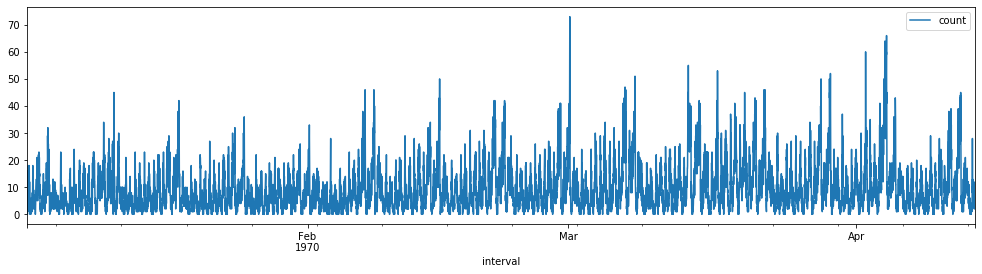

In [42]:
logins_df.plot('interval', 'count', figsize=(17, 4))

Plot of the entire dataset appears to show a regular pattern with approximately 4 peaks each month.

In [43]:
#adding columns for day and hour
logins_df['day'] = logins_df['interval'].dt.day_name()
logins_df['hour'] = logins_df['interval'].dt.hour

logins_df.head()

,interval,count,day,hour
0,1970-01-01 20:00:00,2,Thursday,20
1,1970-01-01 20:15:00,6,Thursday,20
2,1970-01-01 20:30:00,9,Thursday,20
3,1970-01-01 20:45:00,7,Thursday,20
4,1970-01-01 21:00:00,1,Thursday,21


In [44]:
#total and average logins per day
nDay_df = logins_df.groupby('day').sum()[['count']]
nDay_df['daily_avg'] = logins_df.groupby('day').mean()[['count']]

nDay_df

,count,daily_avg
day,,
Friday,15208,10.561111
Monday,8823,6.213380
Saturday,19377,13.456250
Sunday,18167,12.615972
Thursday,11960,8.794118
Tuesday,9268,6.895833
Wednesday,10339,7.692708


In [30]:
#total and average logins per hour
nHour_df = logins_df.groupby('hour').sum()[['count']]
nHour_df['hourly_avg'] = logins_df.groupby('hour').mean()[['count']]

nHour_df

,count,hourly_avg
hour,,
0,5993,14.688725
1,6317,15.482843
2,5800,14.215686
3,4831,11.840686
4,5034,12.338235
5,2945,7.218137
6,1138,2.789216
7,815,1.997549
8,818,2.004902


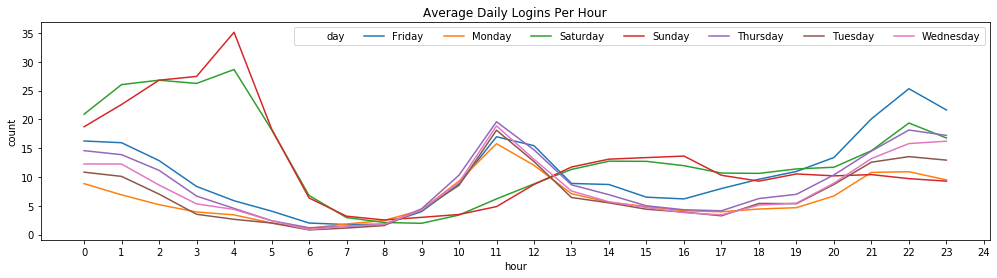

In [45]:
temp_df = logins_df.groupby(['hour', 'day']).mean().reset_index()

f, axes = plt.subplots(figsize=(17, 4))
ax = sns.lineplot(x='hour', y='count', data=temp_df, hue='day')
ax.legend(loc="upper right", ncol=8)
ax.set(title='Average Daily Logins Per Hour')
plt.xticks(range(0,25))

plt.show()

Rides seem to spike in the very early morning, mid day, and late at night, while also increasing on the weekends.

# Part 2

1. Tracking driver engagement on the weekends before and after the reimbursement would show whether the proposed experiment is effective because drivers are more likely to split their time between the cities on the weekend because there is reasonable activity in both cities on weekends. During the week, it is unlikely that a driver will work all day in Metropolis and then all night in Gotham, so focusing on weekdays as well would likely skew the results of this experiment.

2. In order to compare the effectiveness of the proposed reimbursement, I would first track drivers before announcement of the reimbursement to calculate the percentage of time that is spent in each city on the weekends. Then, I would announce the reimbursement of tolls going between the two cities, then calculate the percentage of time spent in each city again after it is in effect. Using a Z-test, I would test for statistically significant difference in mean proportion of time spent in each city. If the percentage of time spent in a certain city increases after the toll reimbursement, then we could conclude that the policy may be driving that. However, the cost of reimbursing the tolls must be compared to the increase in profit from having more available drivers in order to really see if the policy is worth implementing.

# Part 3

In [50]:
with open('ultimate_data_challenge.json') as f:
    data = json.loads(f.read())
ultimate_df = pd.DataFrame(data)

ultimate_df['last_trip_date'] = pd.to_datetime(ultimate_df['last_trip_date'])
ultimate_df['signup_date'] = pd.to_datetime(ultimate_df['signup_date'])

ultimate_df.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


In [51]:
ultimate_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
city                      50000 non-null object
trips_in_first_30_days    50000 non-null int64
signup_date               50000 non-null datetime64[ns]
avg_rating_of_driver      41878 non-null float64
avg_surge                 50000 non-null float64
last_trip_date            50000 non-null datetime64[ns]
phone                     49604 non-null object
surge_pct                 50000 non-null float64
ultimate_black_user       50000 non-null bool
weekday_pct               50000 non-null float64
avg_dist                  50000 non-null float64
avg_rating_by_driver      49799 non-null float64
dtypes: bool(1), datetime64[ns](2), float64(6), int64(1), object(2)
memory usage: 4.2+ MB


In [52]:
#drop rows without phone info
ultimate_df = ultimate_df.drop(ultimate_df[ultimate_df.phone.isna()==True].index, axis=0)

In [57]:
ultimate_df['avg_rating_by_driver'] = ultimate_df['avg_rating_by_driver'].fillna(value=ultimate_df['avg_rating_by_driver'].mean())
ultimate_df['avg_rating_of_driver'] = ultimate_df['avg_rating_of_driver'].fillna(value=ultimate_df['avg_rating_of_driver'].mean())

In [59]:
ultimate_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49604 entries, 0 to 49999
Data columns (total 12 columns):
city                      49604 non-null object
trips_in_first_30_days    49604 non-null int64
signup_date               49604 non-null datetime64[ns]
avg_rating_of_driver      49604 non-null float64
avg_surge                 49604 non-null float64
last_trip_date            49604 non-null datetime64[ns]
phone                     49604 non-null object
surge_pct                 49604 non-null float64
ultimate_black_user       49604 non-null bool
weekday_pct               49604 non-null float64
avg_dist                  49604 non-null float64
avg_rating_by_driver      49604 non-null float64
dtypes: bool(1), datetime64[ns](2), float64(6), int64(1), object(2)
memory usage: 4.6+ MB


In [61]:
#set current date to be date of last trip in dataset
current_date = ultimate_df['last_trip_date'].max()

#find active users
ultimate_df['active'] = ultimate_df['last_trip_date'].apply(lambda date: 0 if (current_date-date).days>30 else 1)

ultimate_df.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,active
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0,1
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0,0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0,0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9,1
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9,0


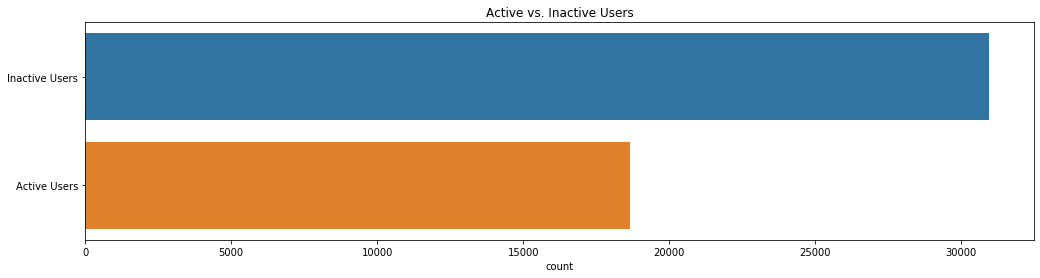

In [67]:
f, axes = plt.subplots(figsize=(17,4))
ax = sns.countplot(y=ultimate_df['active'])
ax.set(title="Active vs. Inactive Users", ylabel='')
ax.set_yticklabels(["Inactive Users", "Active Users"])
plt.show()

In [68]:
ultimate_df['active'].sum()/ultimate_df['active'].count()

0.37640109668575117

About 37.64% of users are considered active from last trip date to current date

In [69]:
#create dummy variables, set target for predictive model
feature_df = pd.get_dummies(ultimate_df,columns=['city','phone','ultimate_black_user'])
target = feature_df['active']

feature_df.drop(['last_trip_date','signup_date','active'], axis=1, inplace=True)

In [70]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, QuantileTransformer
from sklearn.model_selection import train_test_split, cross_val_score

I will be using a random forest classifier to see which features are most important in whether a user is active.

In [75]:
scaler = QuantileTransformer()
scaled_features = scaler.fit_transform(feature_df)

X_train, X_test, y_train, y_test = train_test_split(scaled_features, target, test_size=0.2, random_state=42)

rf = RandomForestClassifier(n_estimators=1000)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

In [76]:
rf.score(X_test, y_test)

0.7515371434331216

In [77]:
print(cross_val_score(rf, X_test, np.ravel(y_test), cv=5))
print(np.mean(cross_val_score(rf, X_test, np.ravel(y_test), cv=5)))

[0.74811083 0.74546371 0.75201613 0.74445565 0.74344758]
0.7485128890062567


In [78]:
feature_importance = pd.DataFrame(zip(list(feature_df.columns), rf.feature_importances_), index=range(feature_df.columns.shape[0]), columns=['feature','importance'])
feature_importance.sort_values(by='importance', ascending=False)

,feature,importance
5,avg_dist,0.299748
4,weekday_pct,0.134251
6,avg_rating_by_driver,0.114970
1,avg_rating_of_driver,0.082074
0,trips_in_first_30_days,0.079615
3,surge_pct,0.075926
2,avg_surge,0.067393
8,city_King's Landing,0.047033
10,phone_Android,0.020079
11,phone_iPhone,0.019128


The accuracy of the random forest classifier is about 75%.

The most important feature for user retention appears to be average distance of trips, while city, ultimate black status, and phone type are relatively unimportant. Ultimate may want to decrease advertising for Ultimate Black because it doesn't seem to be an effective way of keeping users active.